In [1]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
%matplotlib notebook

In [2]:
cuda_gpucount = [1, 2, 3, 4]

energy_cuda_files = ["../build_cuda_1/" + f for f in listdir("../build_cuda_1/") if "_0_100_0" in f]
energy_cuda_files += ["../build_cuda_2/" + f for f in listdir("../build_cuda_2/") if "_0_100_0" in f]
energy_cuda_files += ["../build_cuda_3/" + f for f in listdir("../build_cuda_3/") if "_0_100_0" in f]
energy_cuda_files += ["../build_cuda_4/" + f for f in listdir("../build_cuda_4/") if "_0_100_0" in f]
energy_cuda_means = []
energy_cuda_stddev = []

energy_omp_files = ["../build_omp/" + f for f in listdir("../build_omp/") if "_0_100_0" in f]
energy_omp_files.sort()
omp_corecount = [int(f[18:].split("_")[0]) / 2 for f in energy_omp_files]
energy_omp_means = []
energy_omp_stddev = []


photon_cuda_files = ["../build_cuda_1/" + f for f in listdir("../build_cuda_1/") if "_0_100_1" in f]
photon_cuda_files += ["../build_cuda_2/" + f for f in listdir("../build_cuda_2/") if "_0_100_1" in f]
photon_cuda_files += ["../build_cuda_3/" + f for f in listdir("../build_cuda_3/") if "_0_100_1" in f]
photon_cuda_files += ["../build_cuda_4/" + f for f in listdir("../build_cuda_4/") if "_0_100_1" in f]
photon_cuda_means = []
photon_cuda_stddev = []

photon_omp_files = ["../build_omp/" + f for f in listdir("../build_omp/") if "_0_100_1" in f]
photon_omp_files.sort()
photon_omp_means = []
photon_omp_stddev = []
             
                    
cluster_cuda_files = ["../build_cuda_1/" + f for f in listdir("../build_cuda_1/") if "_0_100_2" in f]
cluster_cuda_files += ["../build_cuda_2/" + f for f in listdir("../build_cuda_2/") if "_0_100_2" in f]
cluster_cuda_files += ["../build_cuda_3/" + f for f in listdir("../build_cuda_3/") if "_0_100_2" in f]
cluster_cuda_files += ["../build_cuda_4/" + f for f in listdir("../build_cuda_4/") if "_0_100_2" in f]
cluster_cuda_means = []
cluster_cuda_stddev = []

cluster_omp_files = ["../build_omp/" + f for f in listdir("../build_omp/") if "_0_100_2" in f]
cluster_omp_files.sort()
cluster_omp_means = []
cluster_omp_stddev = []

In [3]:
energy_cuda_times = []
photon_cuda_times = []
cluster_cuda_times = []
energy_cuda_stddev = []
photon_cuda_stddev = []
cluster_cuda_stddev = []

energy_omp_times = []
photon_omp_times = []
cluster_omp_times = []
energy_omp_stddev = []
photon_omp_stddev = []
cluster_omp_stddev = []

for i in range(len(cuda_gpucount)):
    d = np.loadtxt(energy_cuda_files[i])/1000000000.
    energy_cuda_times += [np.mean(d[1:])]
    energy_cuda_stddev += [np.std(d[1:])]
    
    d = np.loadtxt(photon_cuda_files[i])/1000000000.
    photon_cuda_times += [np.mean(d[1:])]
    photon_cuda_stddev += [np.std(d[1:])]
    
    d = np.loadtxt(cluster_cuda_files[i])/1000000000.
    cluster_cuda_times += [np.mean(d[1:])]
    cluster_cuda_stddev += [np.std(d[1:])]
    
for i in range(len(omp_corecount)):
    d = np.loadtxt(energy_omp_files[i])/1000000000.
    energy_omp_times += [np.mean(d[1:])]
    energy_omp_stddev += [np.std(d[1:])]
    
    d = np.loadtxt(photon_omp_files[i])/1000000000.
    photon_omp_times += [np.mean(d[1:])]
    photon_omp_stddev += [np.std(d[1:])]
    
    d = np.loadtxt(cluster_omp_files[i])/1000000000.
    cluster_omp_times += [np.mean(d[1:])]
    cluster_omp_stddev += [np.std(d[1:])]

<IPython.core.display.Javascript object>


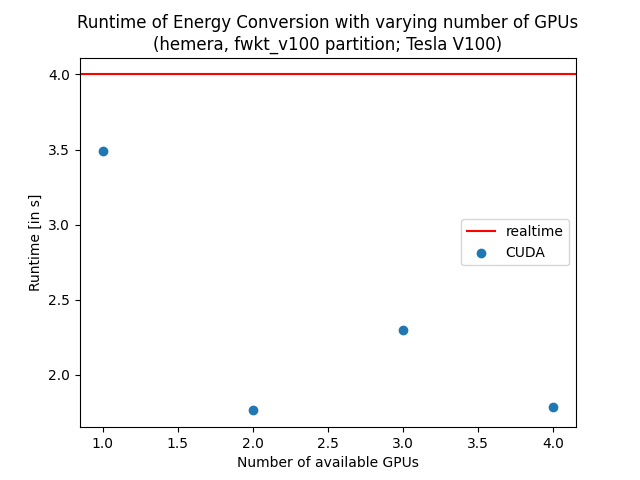

<IPython.core.display.Javascript object>


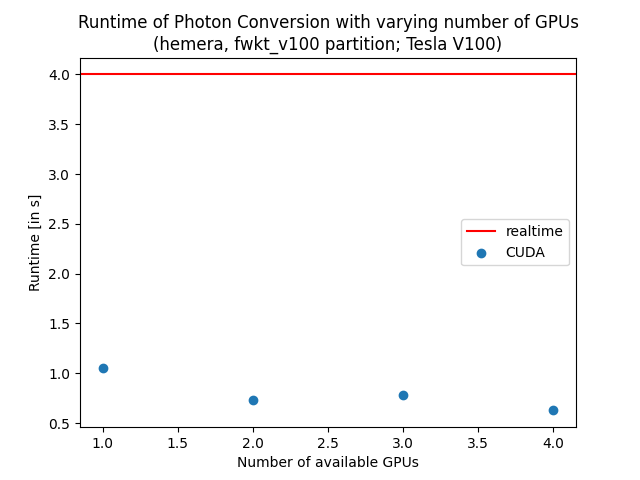

<IPython.core.display.Javascript object>


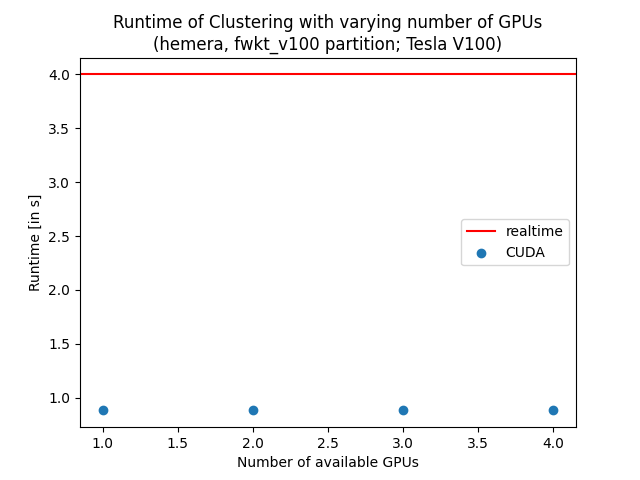

In [4]:
f1 = plt.figure(1)
ax1 = f1.add_subplot(1, 1, 1)
ax1.scatter(cuda_gpucount, energy_cuda_times, label="CUDA")
ax1.set_xlabel("Number of available GPUs")
ax1.set_ylabel("Runtime [in s]")
plt.title("Runtime of Energy Conversion with varying number of GPUs\n(hemera, fwkt_v100 partition; Tesla V100)")
ax1.axhline(y=4, color='red', label="realtime")
ax1.legend(loc="center right")
plt.show()

f2 = plt.figure(2)
ax2 = f2.add_subplot(1, 1, 1)
ax2.scatter(cuda_gpucount, photon_cuda_times, label="CUDA")
ax2.set_xlabel("Number of available GPUs")
ax2.set_ylabel("Runtime [in s]")
plt.title("Runtime of Photon Conversion with varying number of GPUs\n(hemera, fwkt_v100 partition; Tesla V100)")
ax2.axhline(y=4, color='red', label="realtime")
ax2.legend(loc="center right")
plt.show()

f3 = plt.figure(3)
ax3 = f3.add_subplot(1, 1, 1)
ax3.scatter(cuda_gpucount, cluster_cuda_times, label="CUDA")
ax3.set_xlabel("Number of available GPUs")
ax3.set_ylabel("Runtime [in s]")
plt.title("Runtime of Clustering with varying number of GPUs\n(hemera, fwkt_v100 partition; Tesla V100)")
ax3.axhline(y=4, color='red', label="realtime")
ax3.legend(loc="center right")
plt.show()

<IPython.core.display.Javascript object>


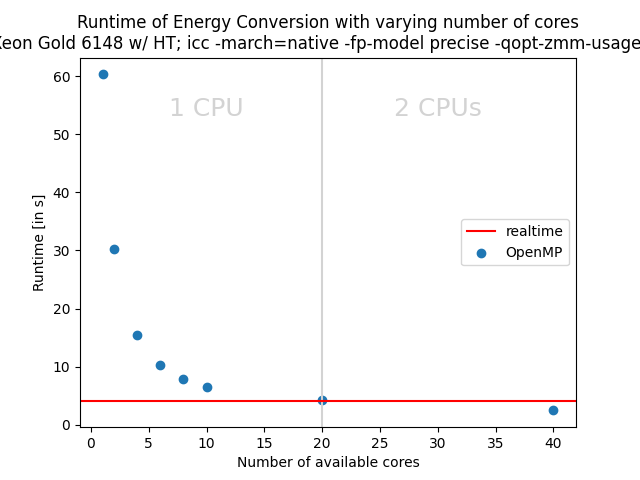

<IPython.core.display.Javascript object>


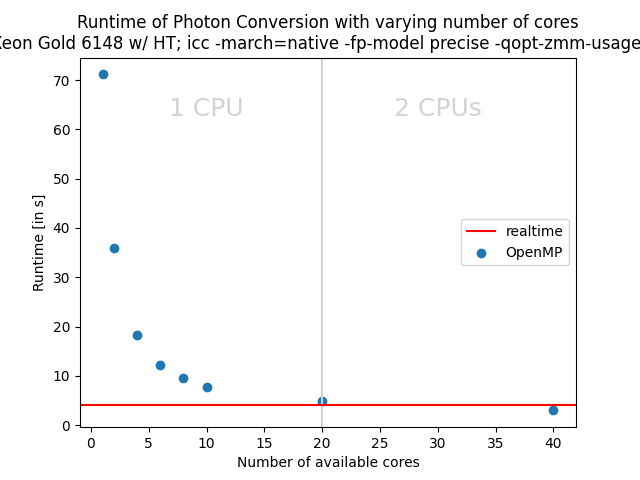

<IPython.core.display.Javascript object>


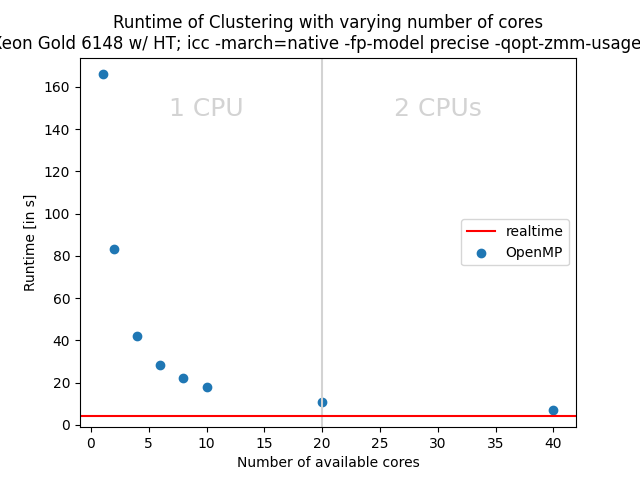

In [10]:
f4 = plt.figure(4)
ax4 = f4.add_subplot(1, 1, 1)
ax4.scatter(omp_corecount, energy_omp_times, label="OpenMP")
ax4.set_xlabel("Number of available cores")
ax4.set_ylabel("Runtime [in s]")
plt.title("Runtime of Energy Conversion with varying number of cores\n(2x Xeon Gold 6148 w/ HT; icc -march=native -fp-model precise -qopt-zmm-usage=high)")

ax4.axvline(x=20, color='lightgrey')
ax4.axhline(y=4, color='red', label="realtime")
plt.text(10, 0.9 * np.max(energy_omp_times), "1 CPU", verticalalignment="center", horizontalalignment="center", color='lightgrey', fontsize=18)
plt.text(30, 0.9 * np.max(energy_omp_times), "2 CPUs", verticalalignment="center", horizontalalignment="center", color='lightgrey', fontsize=18)

ax4.legend(loc="center right")

plt.show()


f5 = plt.figure(5)
ax5 = f5.add_subplot(1, 1, 1)
ax5.scatter(omp_corecount, photon_omp_times, label="OpenMP")
ax5.set_xlabel("Number of available cores")
ax5.set_ylabel("Runtime [in s]")
plt.title("Runtime of Photon Conversion with varying number of cores\n(2x Xeon Gold 6148 w/ HT; icc -march=native -fp-model precise -qopt-zmm-usage=high)")

ax5.axvline(x=20, color='lightgrey')
ax5.axhline(y=4, color='red', label="realtime")
plt.text(10, 0.9 * np.max(photon_omp_times), "1 CPU", verticalalignment="center", horizontalalignment="center", color='lightgrey', fontsize=18)
plt.text(30, 0.9 * np.max(photon_omp_times), "2 CPUs", verticalalignment="center", horizontalalignment="center", color='lightgrey', fontsize=18)

ax5.legend(loc="center right")

plt.show()


f6 = plt.figure(6)
ax6 = f6.add_subplot(1, 1, 1)
ax6.scatter(omp_corecount, cluster_omp_times, label="OpenMP")
ax6.set_xlabel("Number of available cores")
ax6.set_ylabel("Runtime [in s]")
plt.title("Runtime of Clustering with varying number of cores\n(2x Xeon Gold 6148 w/ HT; icc -march=native -fp-model precise -qopt-zmm-usage=high)")

ax6.axvline(x=20, color='lightgrey')
ax6.axhline(y=4, color='red', label="realtime")
plt.text(10, 0.9 * np.max(cluster_omp_times), "1 CPU", verticalalignment="center", horizontalalignment="center", color='lightgrey', fontsize=18)
plt.text(30, 0.9 * np.max(cluster_omp_times), "2 CPUs", verticalalignment="center", horizontalalignment="center", color='lightgrey', fontsize=18)

ax6.legend(loc="center right")

plt.show()

In [6]:
print(np.array(energy_cuda_stddev) / np.array(energy_cuda_times) * 100., np.array(photon_cuda_stddev) / np.array(photon_cuda_times) * 100., np.array(cluster_cuda_stddev) / np.array(cluster_cuda_times) * 100.)
print(np.array(energy_omp_stddev) / np.array(energy_omp_times) * 100., np.array(photon_omp_stddev) / np.array(photon_omp_times) * 100., np.array(cluster_omp_stddev) / np.array(cluster_omp_times) * 100.)

[0.10757131 0.12000843 0.12373427 0.08786647] [0.34974233 0.49601128 0.91714425 0.13946879] [1.39845849 2.56104993 0.87378586 1.00279283]
[0.94659646 1.07058018 1.32397963 0.47059346 1.35229394 0.55355874
 1.75528393 0.92458762] [0.87873442 1.42360356 1.08645307 0.55161384 0.75032525 0.79089564
 1.07301291 0.82561768] [0.64373256 0.80278908 0.77780655 0.39147278 0.36862755 0.47745422
 1.27017344 0.47998256]


<IPython.core.display.Javascript object>


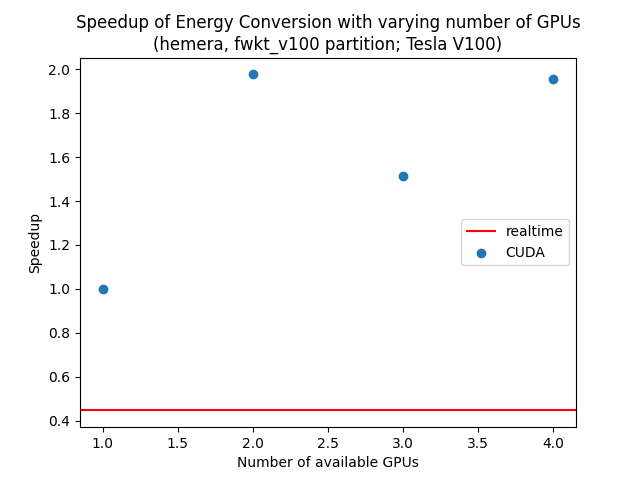

<IPython.core.display.Javascript object>


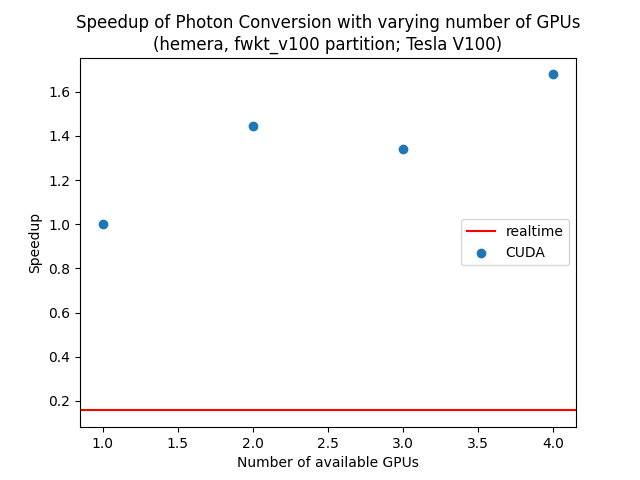

<IPython.core.display.Javascript object>


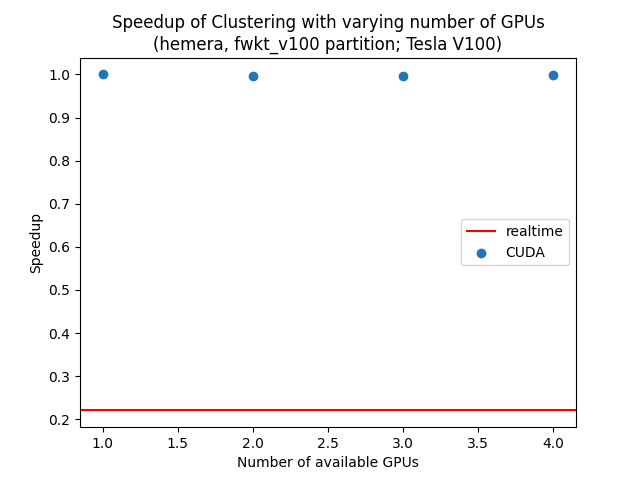

In [7]:
f7 = plt.figure(7)
ax7 = f7.add_subplot(1, 1, 1)
ax7.scatter(cuda_gpucount, energy_cuda_times[0] / np.array(energy_cuda_times), label="CUDA")
ax7.set_xlabel("Number of available GPUs")
ax7.set_ylabel("Speedup")
plt.title("Speedup of Energy Conversion with varying number of GPUs\n(hemera, fwkt_v100 partition; Tesla V100)")
ax7.axhline(y=energy_cuda_times[3] / 4, color='red', label="realtime")
ax7.legend(loc="center right")
plt.show()

f8 = plt.figure(8)
ax8 = f8.add_subplot(1, 1, 1)
ax8.scatter(cuda_gpucount, photon_cuda_times[0] / np.array(photon_cuda_times), label="CUDA")
ax8.set_xlabel("Number of available GPUs")
ax8.set_ylabel("Speedup")
plt.title("Speedup of Photon Conversion with varying number of GPUs\n(hemera, fwkt_v100 partition; Tesla V100)")
ax8.axhline(y=photon_cuda_times[3] / 4, color='red', label="realtime")
ax8.legend(loc="center right")
plt.show()

f9 = plt.figure(9)
ax9 = f9.add_subplot(1, 1, 1)
ax9.scatter(cuda_gpucount, cluster_cuda_times[0] / np.array(cluster_cuda_times), label="CUDA")
ax9.set_xlabel("Number of available GPUs")
ax9.set_ylabel("Speedup")
plt.title("Speedup of Clustering with varying number of GPUs\n(hemera, fwkt_v100 partition; Tesla V100)")
ax9.axhline(y=cluster_cuda_times[3] / 4, color='red', label="realtime")
ax9.legend(loc="center right")
plt.show()

<IPython.core.display.Javascript object>


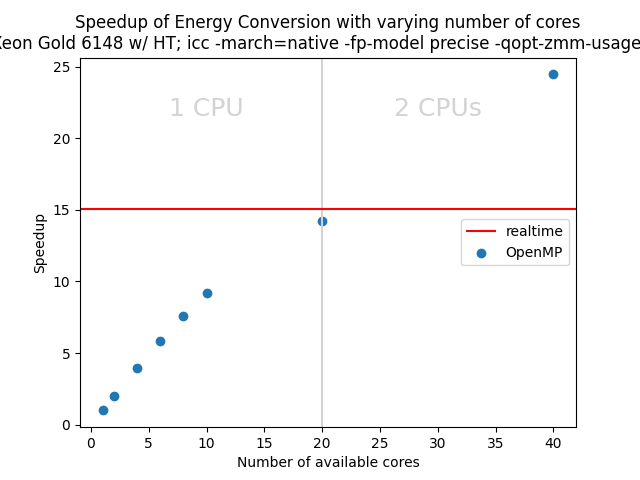

<IPython.core.display.Javascript object>


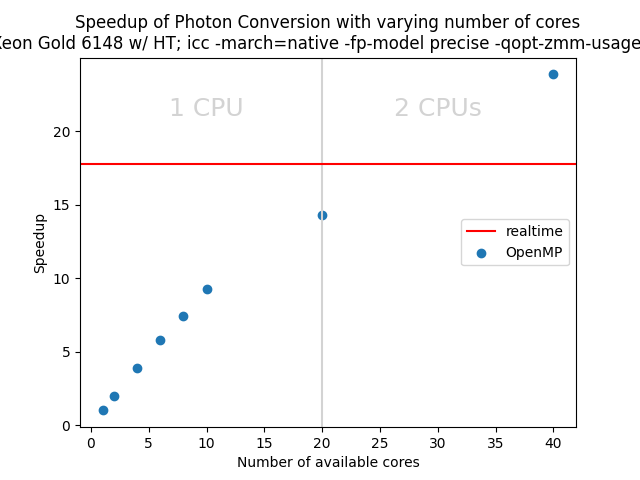

<IPython.core.display.Javascript object>


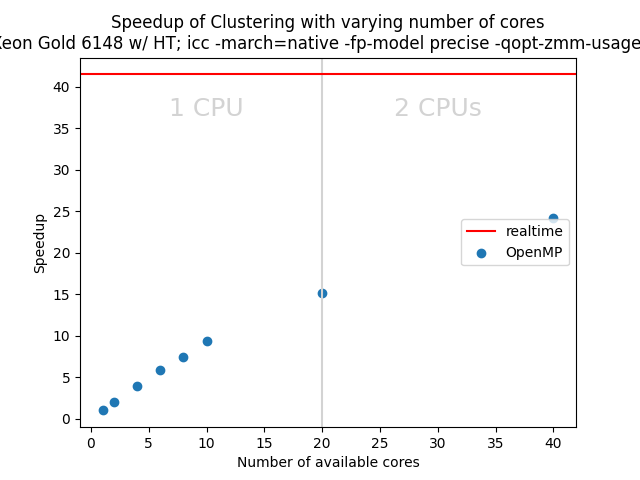

In [16]:
f10 = plt.figure(10)
ax10 = f10.add_subplot(1, 1, 1)
ax10.scatter(omp_corecount, energy_omp_times[3] / np.array(energy_omp_times), label="OpenMP")
ax10.set_xlabel("Number of available cores")
ax10.set_ylabel("Speedup")
plt.title("Speedup of Energy Conversion with varying number of cores\n(2x Xeon Gold 6148 w/ HT; icc -march=native -fp-model precise -qopt-zmm-usage=high)")

ax10.axvline(x=20, color='lightgrey')
ax10.axhline(y=energy_omp_times[3] / 4, color='red', label="realtime")
m = np.max(energy_omp_times[3] / np.array(energy_omp_times))
m = np.max([m, energy_omp_times[3] / 4])
plt.text(10, 0.9 * np.max(m), "1 CPU", verticalalignment="center", horizontalalignment="center", color='lightgrey', fontsize=18)
plt.text(30, 0.9 * np.max(m), "2 CPUs", verticalalignment="center", horizontalalignment="center", color='lightgrey', fontsize=18)

ax10.legend(loc="center right")

plt.show()


f11 = plt.figure(11)
ax11 = f11.add_subplot(1, 1, 1)
ax11.scatter(omp_corecount, photon_omp_times[3] / np.array(photon_omp_times), label="OpenMP")
ax11.set_xlabel("Number of available cores")
ax11.set_ylabel("Speedup")
plt.title("Speedup of Photon Conversion with varying number of cores\n(2x Xeon Gold 6148 w/ HT; icc -march=native -fp-model precise -qopt-zmm-usage=high)")

ax11.axvline(x=20, color='lightgrey')
ax11.axhline(y=photon_omp_times[3] / 4, color='red', label="realtime")
m = np.max(photon_omp_times[3] / np.array(photon_omp_times))
m = np.max([m, photon_omp_times[3] / 4])
plt.text(10, 0.9 * np.max(m), "1 CPU", verticalalignment="center", horizontalalignment="center", color='lightgrey', fontsize=18)
plt.text(30, 0.9 * np.max(m), "2 CPUs", verticalalignment="center", horizontalalignment="center", color='lightgrey', fontsize=18)

ax11.legend(loc="center right")

plt.show()


f12 = plt.figure(12)
ax12 = f12.add_subplot(1, 1, 1)
ax12.scatter(omp_corecount, cluster_omp_times[3] / np.array(cluster_omp_times), label="OpenMP")
ax12.set_xlabel("Number of available cores")
ax12.set_ylabel("Speedup")
plt.title("Speedup of Clustering with varying number of cores\n(2x Xeon Gold 6148 w/ HT; icc -march=native -fp-model precise -qopt-zmm-usage=high)")

ax12.axvline(x=20, color='lightgrey')
ax12.axhline(y=cluster_omp_times[3] / 4, color='red', label="realtime")
m = np.max(cluster_omp_times[3] / np.array(cluster_omp_times))
m = np.max([m, cluster_omp_times[3] / 4])
plt.text(10, 0.9 * np.max(m), "1 CPU", verticalalignment="center", horizontalalignment="center", color='lightgrey', fontsize=18)
plt.text(30, 0.9 * np.max(m), "2 CPUs", verticalalignment="center", horizontalalignment="center", color='lightgrey', fontsize=18)

ax12.legend(loc="center right")

plt.show()

In [20]:
energy_omp_times.sort()
print(10000./energy_omp_times[1])
photon_omp_times.sort()
print(10000./photon_omp_times[1])
cluster_omp_times.sort()
print(10000./cluster_omp_times[1])

print(10000./energy_cuda_times[0])
print(10000./photon_cuda_times[0])
print(10000./cluster_cuda_times[0])

4.2521755761616165
4.970330165646464
10.99644014640404
3.489199080494949
1.0527408992222225
0.8820009983939393


In [21]:
energy_omp_times.sort()
print(10000./energy_omp_times[1])
photon_omp_times.sort()
print(10000./photon_omp_times[1])
cluster_omp_times.sort()
print(10000./cluster_omp_times[1])

print(10000./energy_cuda_times[0])
print(10000./photon_cuda_times[0])
print(10000./cluster_cuda_times[0])

2351.7373214929357
2011.9387780548686
909.3852071090581
2865.987227814322
9499.013486973025
11337.855646659453


In [ ]:
# 16:30-23:30 -1.0h = 6
# keep old flags for CPU version because they were faster in certain scenarios
# restart benchmark with "-O3 -march=native -qopt zmm-usage=high -fp-model fast=2 -no-prec-div"
# redo graphs with red background color